In [1]:
include("../Engine/Engine.jl")
using .Engine

using StatsBase, DataFrames
using Graphs, SimpleWeightedGraphs
import PyPlot as plt
import Seaborn as sns
import PlotlyJS

rcParams = plt.PyDict(plt.matplotlib."rcParams")
rcParams["text.usetex"] = false
rcParams["font.family"] = ["sans-serif"]
rcParams["font.serif"] = ["Computer Modern Roman"];

In [ ]:
graphs_JDD, cascades_JDD, df_JDD = load_data("/home/ubuntu/Thesis/Results/JDD_all_users/COP26/data.jld2")
graphs_TE, cascades_TE, df_TE = load_data("/home/ubuntu/Thesis/Results/TE_all_users/COP26/data.jld2");

In [2]:
graphs_JDD, cascades_JDD, df_JDD = load_data("/home/ubuntu/Thesis/Results/JDD_all_users/COP26/data.jld2")
graphs2_JDD, cascades2_JDD, df2_JDD = load_data("/home/ubuntu/Thesis/Results/JDD_all_users/Random/data.jld2");

centrality_ranks_JDD = get_centrality_ranks(graphs_JDD, df_JDD, 0, "Any Edge")
all_centrality_ranks_JDD = get_centrality_ranks_all_edges(graphs_JDD, df_JDD, 0);

In [3]:
graphs_TE, cascades_TE, df_TE = load_data("/home/ubuntu/Thesis/Results/TE_all_users/COP26/data.jld2")
graphs2_TE, cascades2_TE, df2_TE = load_data("/home/ubuntu/Thesis/Results/TE_all_users/Random/data.jld2");

centrality_ranks_TE = get_centrality_ranks(graphs_TE, df_TE, 0, "Any Edge")
all_centrality_ranks_TE = get_centrality_ranks_all_edges(graphs_TE, df_TE, 0);

In [4]:
general_ranks = get_general_ranks(COP26, cop_26_dates);

In [ ]:
corr_JDD_TE = correlation_JDD_TE(all_centrality_ranks_JDD, all_centrality_ranks_TE, 50)
show(corr_JDD_TE, allcols=true)

In [ ]:
print(Helpers._latexify2(corr_JDD_TE))

In [ ]:
print(latexify(corr_JDD_TE))

# Table general

In [ ]:
general_ranking = find_max_ranks(general_ranks, 10)
print(latexify(general_ranking))

In [ ]:
show(general_ranking[3], allcols=true)

# Tables JDD

In [ ]:
centrality_ranking_JDD = find_max_ranks(centrality_ranks_JDD, 10)
print(latexify(centrality_ranking_JDD))

In [ ]:
show(centrality_ranking_JDD[1], allcols=true)

In [ ]:
all_centrality_ranking_JDD = find_max_ranks(all_centrality_ranks_JDD, 10)
print(latexify(all_centrality_ranking_JDD))

In [ ]:
show(all_centrality_ranking_JDD[3], allcols=true)

# Tables TE

In [ ]:
centrality_ranking_TE = find_max_ranks(centrality_ranks_TE, 10)
print(latexify(centrality_ranking_TE))

In [ ]:
show(centrality_ranking_TE[1], allcols=true)

In [ ]:
all_centrality_ranking_TE = find_max_ranks(all_centrality_ranks_TE, 10)
print(latexify(all_centrality_ranking_TE))

In [ ]:
show(all_centrality_ranking_TE[1], allcols=true)

# Correlation matrices

In [5]:
plot_correlation_matrices(general_ranks, centrality_ranks_JDD, 50, save=true, foldername="/home/ubuntu/Thesis/Figures/COP26/JDD_all_users/")

┌ Warning: Partition After COP26 : tweet_rank or outdegree_rank has some missing values
└ @ Main.Engine.Metrics /home/ubuntu/Thesis/Julia/Utils/Metrics.jl:481
┌ Warning: Partition After COP26 : tweet_rank or betweenness_rank has some missing values
└ @ Main.Engine.Metrics /home/ubuntu/Thesis/Julia/Utils/Metrics.jl:481
┌ Warning: Partition After COP26 : follower_rank or outdegree_rank has some missing values
└ @ Main.Engine.Metrics /home/ubuntu/Thesis/Julia/Utils/Metrics.jl:481
┌ Warning: Partition After COP26 : follower_rank or betweenness_rank has some missing values
└ @ Main.Engine.Metrics /home/ubuntu/Thesis/Julia/Utils/Metrics.jl:481
┌ Warning: Partition After COP26 : retweet_rank or outdegree_rank has some missing values
└ @ Main.Engine.Metrics /home/ubuntu/Thesis/Julia/Utils/Metrics.jl:481
┌ Warning: Partition After COP26 : retweet_rank or betweenness_rank has some missing values
└ @ Main.Engine.Metrics /home/ubuntu/Thesis/Julia/Utils/Metrics.jl:481
┌ Warning: Partition After COP

In [6]:
plot_correlation_matrices(general_ranks, centrality_ranks_TE, 50, save=true, foldername="/home/ubuntu/Thesis/Figures/COP26/TE_all_users/")

# Edge types

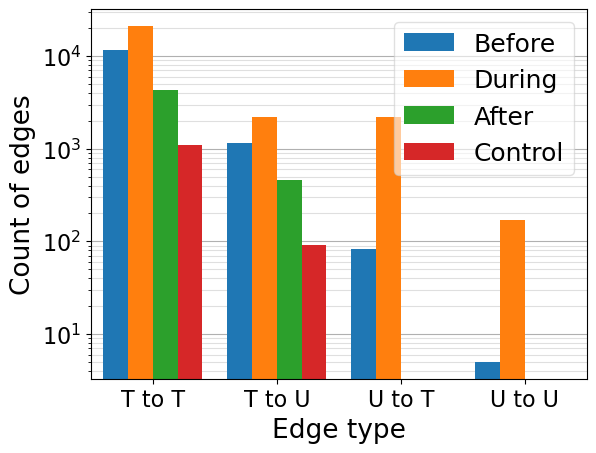

In [11]:
plot_edge_types([graphs_JDD, graphs2_JDD], [df_JDD, df2_JDD], [0, 0]; y="count", hue_order=["Before", "During", "After", "Control"],
    save=true, filename="/home/ubuntu/Thesis/Figures/COP26/JDD_all_users/edge_type_count.pdf", log=true)

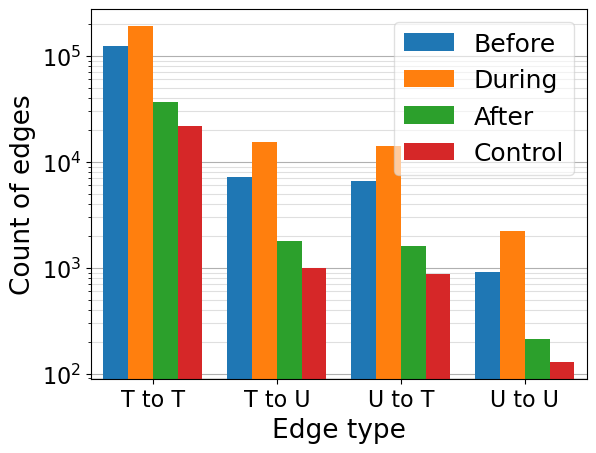

In [12]:
plot_edge_types([graphs_TE, graphs2_TE], [df_TE, df2_TE], [0, 0]; y="count", hue_order=["Before", "During", "After", "Control"],
    save=true, filename="/home/ubuntu/Thesis/Figures/COP26/TE_all_users/edge_type_count.pdf", log=true)

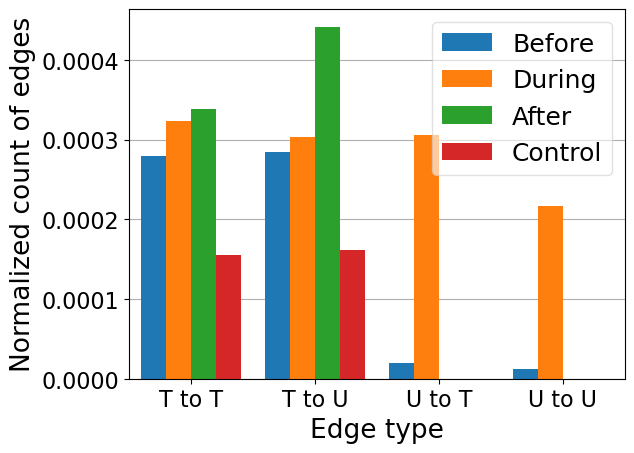

In [13]:
plot_edge_types([graphs_JDD, graphs2_JDD], [df_JDD, df2_JDD], [0, 0]; y="count_normalized", hue_order=["Before", "During", "After", "Control"],
    save=true, filename="/home/ubuntu/Thesis/Figures/COP26/JDD_all_users/edge_type.pdf", log=false)

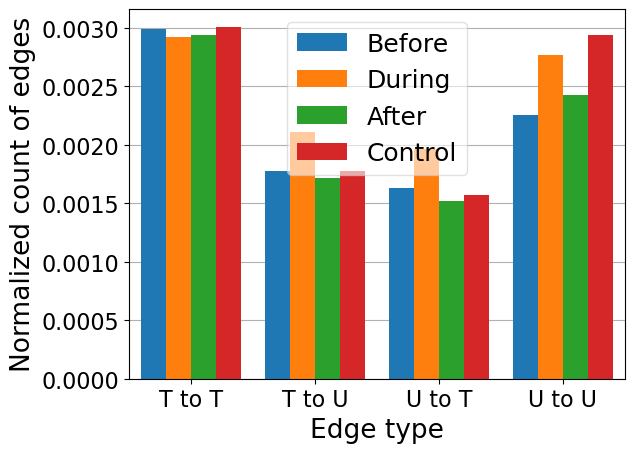

In [14]:
plot_edge_types([graphs_TE, graphs2_TE], [df_TE, df2_TE], [0, 0]; y="count_normalized", hue_order=["Before", "During", "After", "Control"],
    save=true, filename="/home/ubuntu/Thesis/Figures/COP26/TE_all_users/edge_type.pdf", log=false)

# Cascades reach

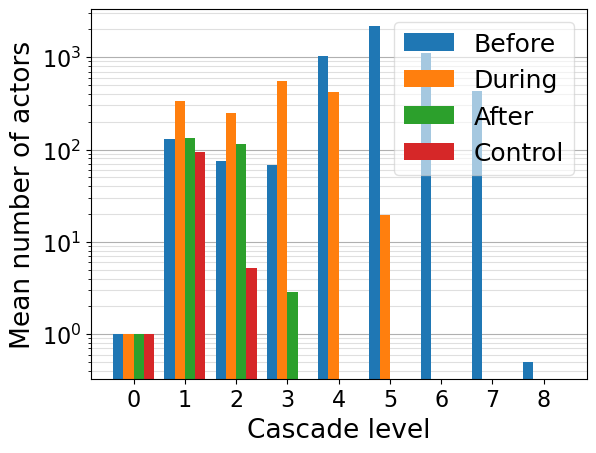

In [15]:
plot_actors_per_level(cascades_JDD, df_JDD, control=cascades2_JDD, save=true, filename="/home/ubuntu/Thesis/Figures/COP26/JDD_all_users/actor_level.pdf", inner_spacing=0)

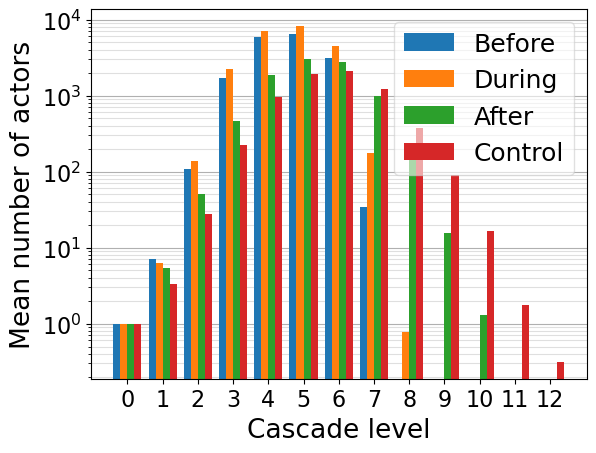

In [16]:
plot_actors_per_level(cascades_TE, df_TE, control=cascades2_TE, save=true, filename="/home/ubuntu/Thesis/Figures/COP26/TE_all_users/actor_level.pdf", inner_spacing=0)

# Cascades

In [ ]:
cascades[3]
PlotlyJS.plot(plot_cascade_sankey(cascades[3][6], df)...)
# PlotlyJS.savefig(PlotlyJS.plot(plot_cascade_sankey(cascades[3][5], df)...), "/home/ubuntu/Thesis/Figures/COP26/TE_all_users/cascade.pdf")